<a href="https://colab.research.google.com/github/Mahima2208/YesBank-Stock/blob/main/Yes_Bank_Mahima_Phalkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#Importing all the libarary
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_yesbank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

In [13]:
df_yesbank.shape

(185, 5)

In [4]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
df_yesbank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
df_yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df_yesbank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [10]:
len(df_yesbank[df_yesbank.duplicated()])

0

In [12]:
df_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [16]:
df_yesbank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [17]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df_yesbank['Date'] = df_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [18]:
df_yesbank.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [19]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


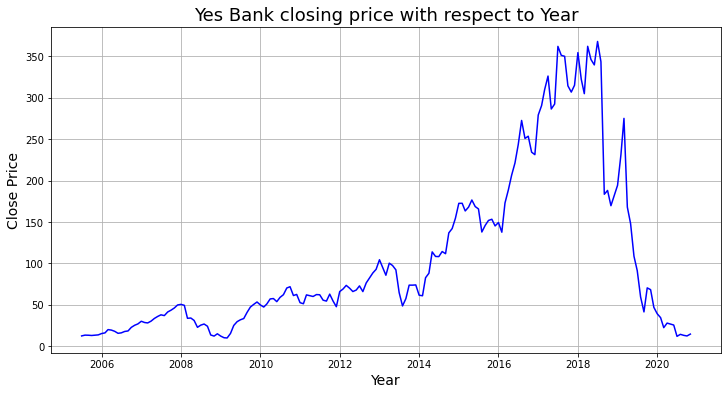

In [25]:
#Ploting close price of stock vs time
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price' ,fontsize=14)
plt.plot(df_yesbank['Date'], df_yesbank['Close'] , color="blue")
plt.title('Yes Bank closing price with respect to Year', fontsize=18)

plt.show()

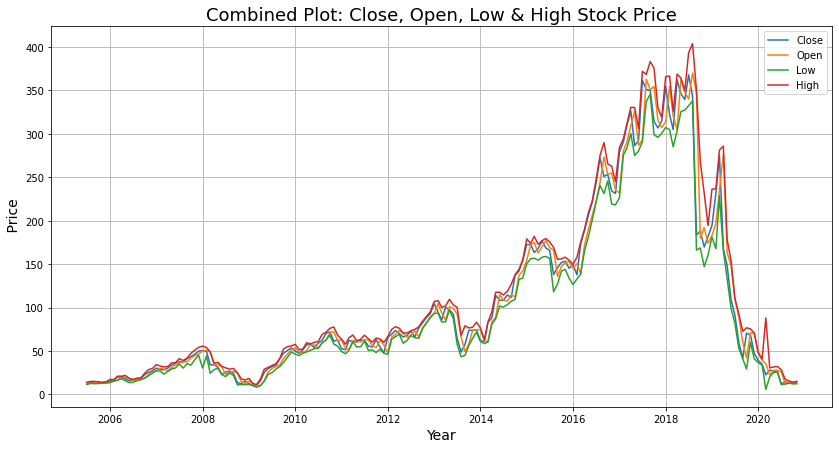

In [22]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel(' Price' ,fontsize=14)
plt.plot(df_yesbank['Date'], df_yesbank['Close'])
plt.plot(df_yesbank['Date'], df_yesbank['Open'])
plt.plot(df_yesbank['Date'], df_yesbank['Low'])
plt.plot(df_yesbank['Date'], df_yesbank['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=18)
plt.show()

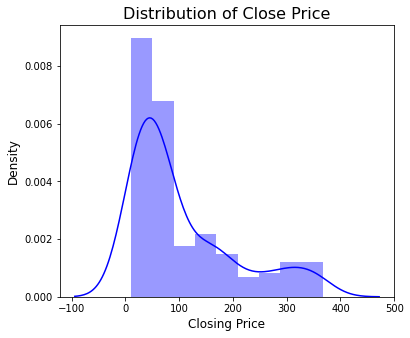

In [24]:
plt.figure(figsize=(6,5))
sns.distplot(df_yesbank['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

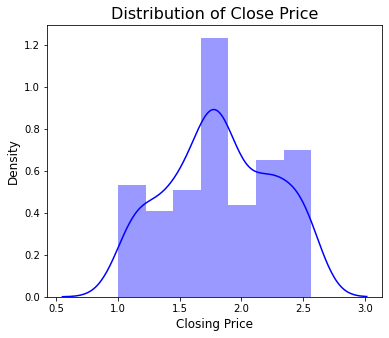

In [26]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df_yesbank['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [27]:
numeric_features = df_yesbank.describe().columns

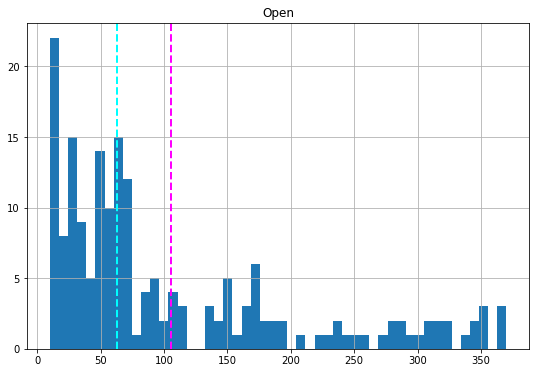

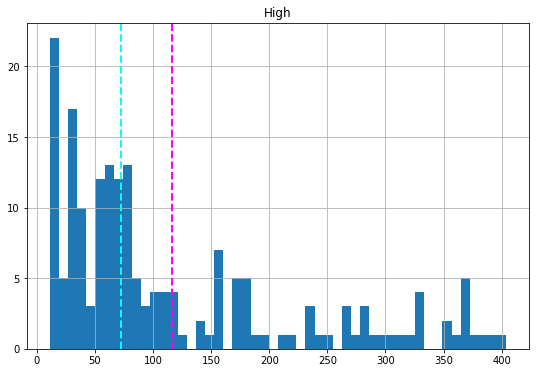

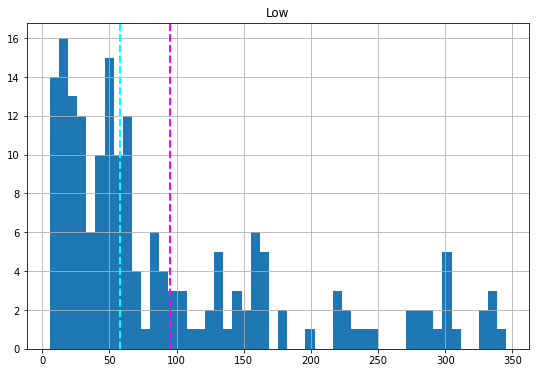

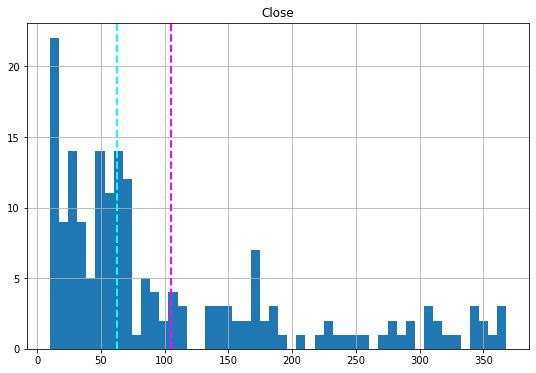

In [28]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_yesbank[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

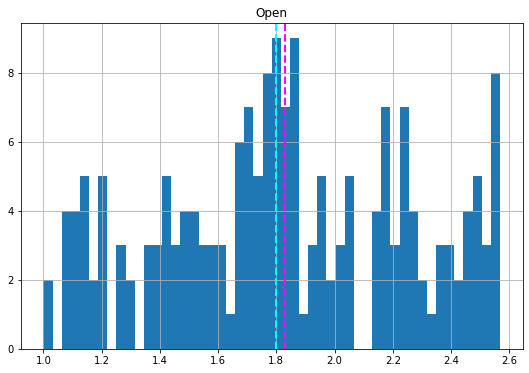

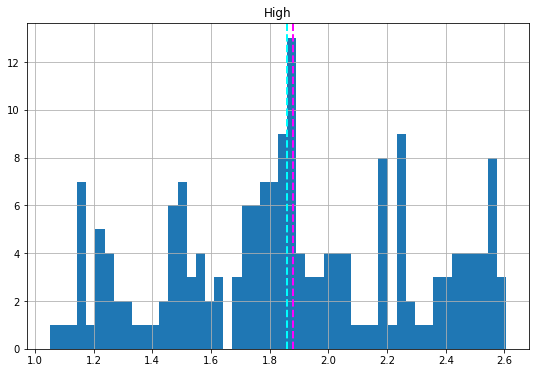

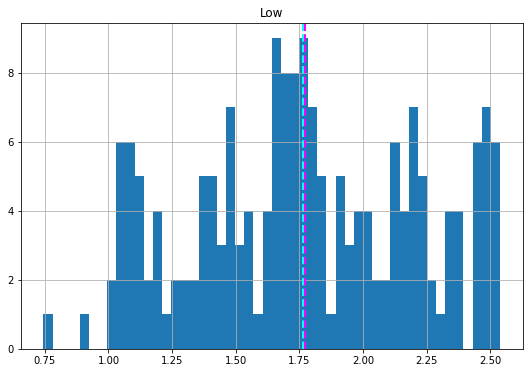

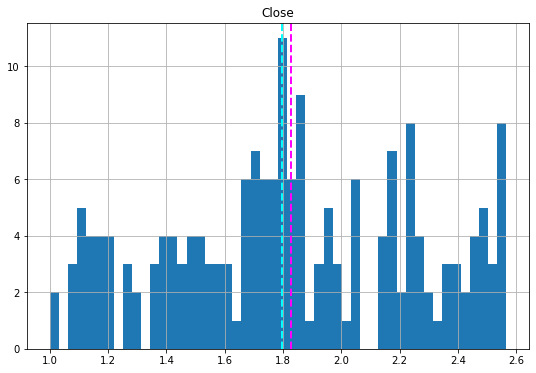

In [29]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df_yesbank[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

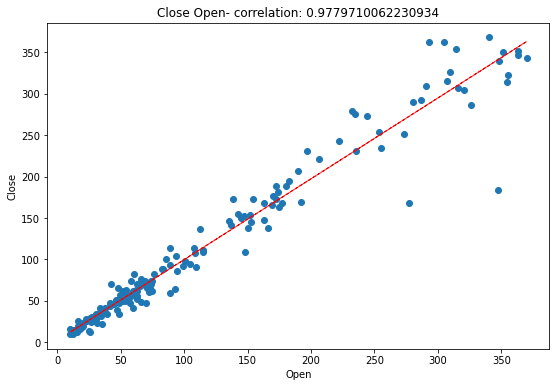

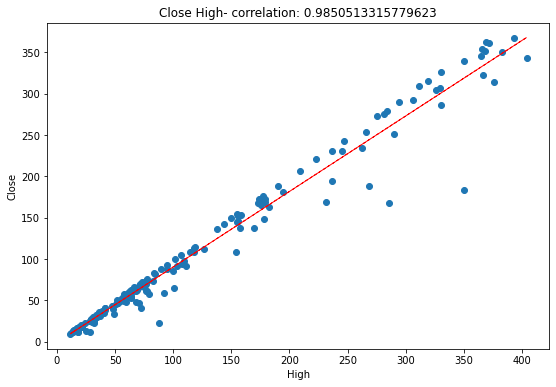

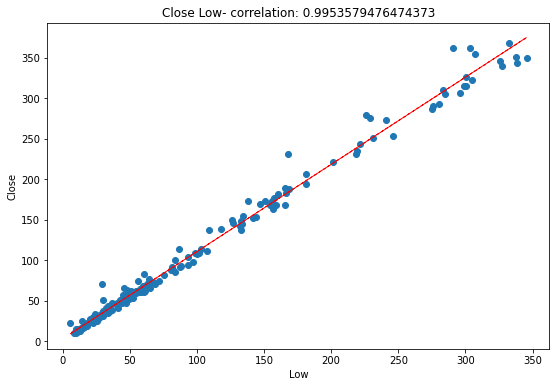

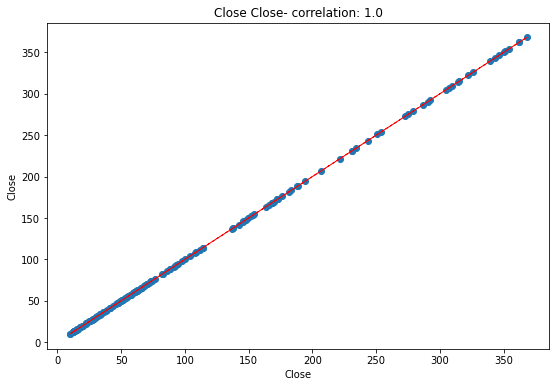

In [30]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_yesbank[col]
   label = df_yesbank['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Close')
   ax.set_title('Close ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df_yesbank[col], df_yesbank['Close'], 1)
   y_hat = np.poly1d(z)(df_yesbank[col])
 
   plt.plot(df_yesbank[col], y_hat, "r--", lw=1)
 
plt.show()

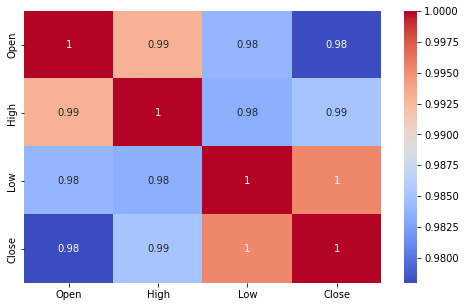

In [31]:
# Correlation
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [49]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [50]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


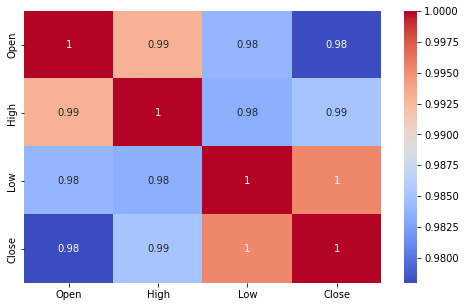

In [51]:
# Correlation
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [53]:
X = df_yesbank.drop(columns=['Close','Date'])
y = df_yesbank['Close']

In [54]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [57]:
X_train.shape

(148, 3)

In [58]:
X_test.shape

(37, 3)

In [59]:
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [62]:

round(linear_reg.score(X_train,y_train), 4)

0.8147

In [63]:
round(linear_reg.score(X_test,y_test), 4)

0.8226

In [64]:
y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [65]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [66]:
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [67]:
test_df[' Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


In [68]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [72]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
R2 : 0.8226


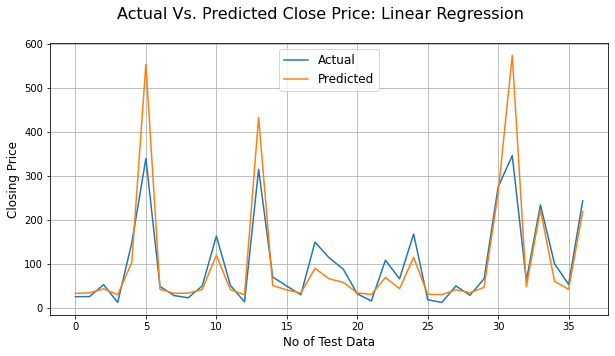

In [70]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [79]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1,max_iter=3000)  #will keep alpha=0.1 and max iteration upto 3000
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [80]:
round(lasso_reg.score(X_train,y_train),4)

0.7596

In [81]:

y_pred_lasso = lasso_reg.predict(X_test)

In [82]:
y_pred_lasso

array([1.59885328, 1.60997773, 1.68949351, 1.56874001, 1.97344962,
       2.50656093, 1.68566448, 1.59981089, 1.60579373, 1.67686268,
       2.01562595, 1.67079926, 1.56599398, 2.42326589, 1.73700316,
       1.66886904, 1.60484921, 1.92532022, 1.82059101, 1.78055609,
       1.61048878, 1.57288435, 1.83725499, 1.68838669, 1.99972092,
       1.57880718, 1.56982374, 1.66984062, 1.61279255, 1.71366385,
       2.26101503, 2.52324602, 1.72444246, 2.22095436, 1.79381669,
       1.67767545, 2.20353159])

In [83]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [85]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0436
RMSE : 0.2088
MAE : 0.1672
MAPE : 0.1099
R2 : 0.755


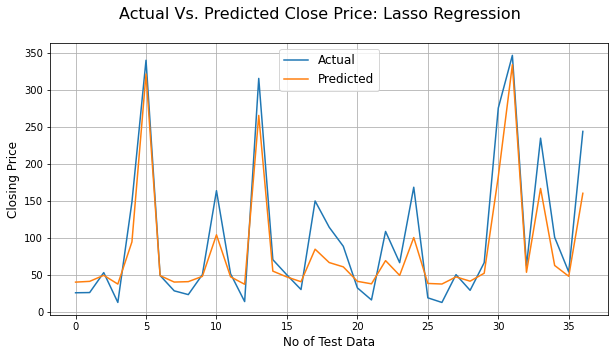

In [86]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [89]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

In [90]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0352


In [91]:
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [92]:
y_pred_lasso_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [93]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [94]:
test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso_cv
lasso_df = test_df.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


In [95]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


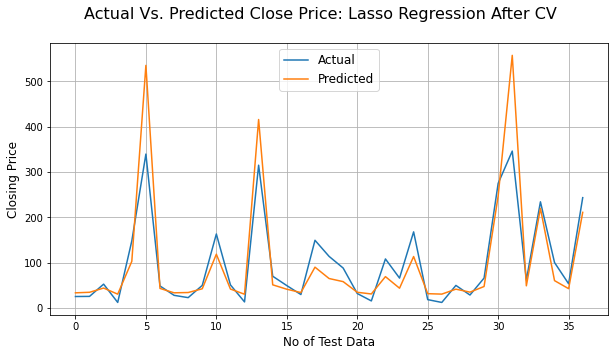

In [96]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [97]:
#fit data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [98]:
round(ridge_reg.score(X_train,y_train),4)

0.8147

In [99]:
y_pred_ridge = ridge_reg.predict(X_test)

In [100]:
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [101]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

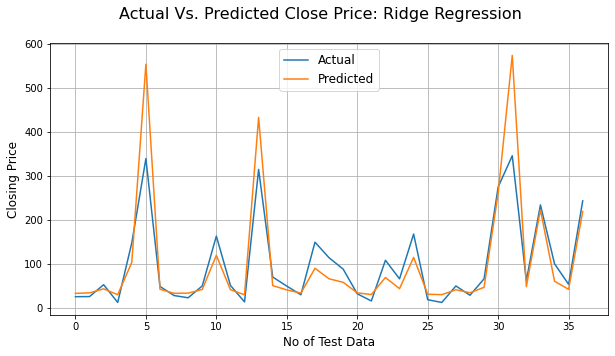

In [102]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [103]:

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [104]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [105]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [106]:
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

In [107]:
y_pred_ridge_cv

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [108]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [109]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


In [110]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 4))

MSE : 0.0325
RMSE : 0.1804
MAE : 0.1531
MAPE : 0.0968
R2 : 0.8172


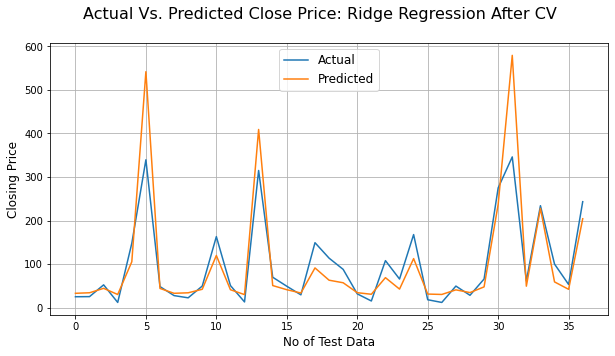

In [111]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [112]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [113]:
round(elastic.score(X_train,y_train),3)

0.796

In [114]:
y_pred_elastic = elastic.predict(X_test)

In [115]:
y_pred_elastic

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [116]:
np.array(y_pred)

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [117]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


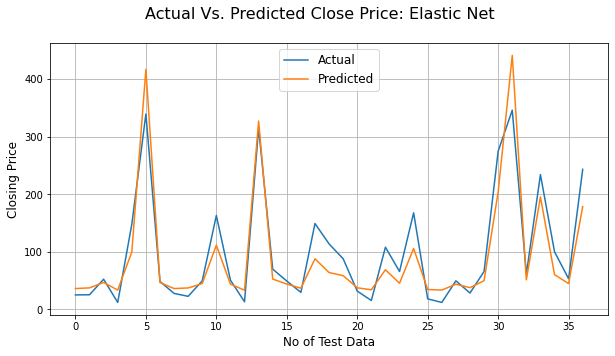

In [118]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [119]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [120]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [121]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [122]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.037


In [123]:
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

In [124]:
y_pred_elastic_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [125]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [126]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic_cv
elastic_df = test_df.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elastic_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


In [127]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


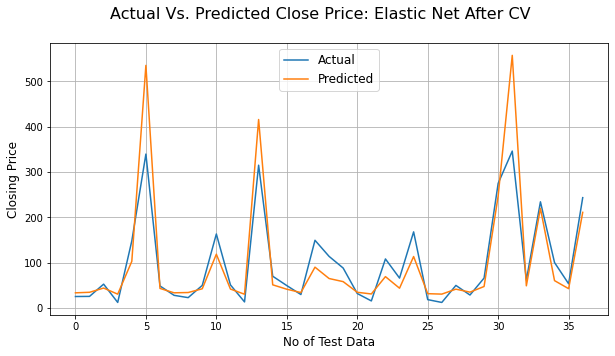

In [128]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [129]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2
  
    
    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df



In [130]:
model = [linear_reg, lasso_reg, ridge_reg, elastic]

In [131]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
3,Lasso,0.0436,0.2088,0.1672,0.1099,0.7550
2,ElasticNet,0.0364,0.1908,0.1574,0.1024,0.7955
1,Ridge,0.0316,0.1777,0.1513,0.0954,0.8225
0,LinearRegression,0.0316,0.1777,0.1513,0.0954,0.8226
